# **심장건강과 환자 변수 데이터분석을 통한 심장마비 위험 예측**
- 데이터셋 변경하였습니다!

- 데이터 출처 : heart-attack-prediction-dataset
https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset

## *<1주차 과정>* 

### **라이브러리 불러오기**

In [12]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/d/iamsouravbanerjee/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv
/kaggle/input/epoch-heart-attack/heart_attack_prediction_dataset.csv
/kaggle/input/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv


## **TASK 1. 데이터 출처 / 데이터 불러오기**

- **데이터 선정 이유 / 분석목적** : 현대의학의 발전에도 불구하고 꾸준히 유지되는 심장마비 발생건수는 심장마비가 아직 해결하기 어려운 질환이라는 것을 의미한다. 환자별 건강세부정보, 생활습관, 나라, 임금 등의 변수와 심장건강을 비교분석하여 유의미한 결론을 도출해 심장마비 예방안을 모색한다.

In [13]:
df = pd.read_csv('/kaggle/input/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv')

## **TASK 2. 기초통계량 확인**

In [14]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [16]:
int_var = df[['Age','Cholesterol','Heart Rate','Diabetes','Family History','Smoking','Obesity','Alcohol Consumption','Previous Heart Problems','Medication Use','Stress Level','Previous Heart Problems','Medication Use','Stress Level','Income','Triglycerides','Physical Activity Days Per Week','Sleep Hours Per Day','Heart Attack Risk' ]]
obj_var = df[['Patient ID','Sex','Blood Pressure','Diet','Country','Continent','Hemisphere' ]]
float_var = df[['Exercise Hours Per Week','Sedentary Hours Per Day','Sedentary Hours Per Day','BMI']]

In [17]:
int_var.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Previous Heart Problems,Medication Use,Stress Level,Previous Heart Problems,Medication Use,Stress Level,Income,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,0.495835,0.498345,5.469702,0.495835,0.498345,5.469702,158263.181901,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,0.500011,0.500026,2.859622,0.500011,0.500026,2.859622,80575.190806,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,20062.000000,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,88310.000000,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,5.000000,157866.000000,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,8.000000,227749.000000,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,10.000000,299954.000000,800.000000,7.000000,10.000000,1.000000


In [18]:
obj_var.describe()

,Patient ID,Sex,Blood Pressure,Diet,Country,Continent,Hemisphere
count,8763,8763,8763,8763,8763,8763,8763
unique,8763,2,3915,3,20,6,2
top,BMW7812,Male,146/94,Healthy,Germany,Asia,Northern Hemisphere
freq,1,6111,8,2960,477,2543,5660


In [19]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


## 데이터 개요

- 데이터 총 샘플 수: 8,763개
- 총 특성(컬럼) 수: 26개

- 수치형 데이터 : 19개 (**연속형데이터**: 나이, 콜레스테롤, 심박수, 주당 운동시간, 하루 좌식시간, 체질량지수, 중성지방, 소득 / **이산형데이터** : 당뇨, 가족력, 흡연여부, 비마여부, 음주여부, 이전심장질환여부, 약물복용여부, 스트레스 수준, 주간운동횟수, 수면시간, 심장마비 위험)

- 범주형 데이터: 7개 (**명목형데이터**: 환자ID, 성별, 국가, 대륙, 반구, 혈압변주, 식단유형)

## 기초통계 분석

**(1) 나이(Age)**
- 평균(mean): 53.7세
- 표준편차(std): 21.2
- 최소(min): 18세
- 최대(max): 90세
→ 데이터가 18~90세로 다양하게 분포, 평균적으로 중장년층이 많음.

**(2) 콜레스테롤(Cholesterol)**
- 평균: 259.88
- 최소/최대: 120 ~ 400
→ 콜레스테롤 수치가 꽤 높은 편으로, 심혈관 질환 위험이 있을 가능성이 큼.

**(3) 심박수(Heart Rate)**
- 평균: 75 bpm
- 최소/최대: 40 ~ 110 bpm
→ 전반적으로 정상 범위이지만, 40 이하/110 이상 값은 위험 가능성이 있음.

**(4) 당뇨(Diabetes)**
- 평균: 0.65 (이진 변수)
→ 전체 데이터 중 약 65%가 당뇨 환자. 심장질환과 관련성이 높을 가능성이 큼.

**(5) 가족력(Family History)**
- 평균: 0.49
→ 약 50%의 사람들이 가족력이 있음. 유전적 영향이 강할 가능성.

**(6) 흡연(Smoking)**
- 평균: 0.89
→ 대부분(약 90%)이 흡연 경험이 있음. 심장질환 위험 요소 중 하나.

**(7) 비만(Obesity)**
- 평균: 0.50
→ 절반 정도가 비만. BMI와 연관성이 높을 것으로 예상됨.

**(8) 운동 시간(Exercise Hours Per Week)**
- 평균: 10시간
- 최소/최대: 0.002 ~ 20시간
→ 대부분 적절한 운동을 하지만, 일부 데이터는 운동 부족 상태일 가능성이 있음.

**(9) BMI (체질량지수)**
- 평균: 28.89
- 최소/최대: 18 ~ 39
→ 평균적으로 과체중(25 이상), 일부는 비만(30 이상) 범주.

**(10) 트리글리세라이드(Triglycerides, 중성지방)**
- 평균: 417
- 최소/최대: 30 ~ 800
→ 혈중 중성지방이 높은 경우가 많음. 콜레스테롤과 연관.

**(11) 좌식 시간(Sedentary Hours Per Day)**
- 평균: 5.99시간
→ 하루 평균 6시간 이상 앉아 있는 생활패턴. 심혈관 건강에 부정적 영향 가능성.

**(12) 심장마비 위험(Heart Attack Risk)**
-평균: 0.35 (이진 변수)
→ 약 35%의 환자가 심장마비 위험군으로 분류됨. 높은 수치.

### 앗! 성별의 분포는?

In [20]:
import pandas as pd

sex_counts = df['Sex'].value_counts()

# 성별 분포 출력
print(sex_counts)

Sex
Male      6111
Female    2652
Name: count, dtype: int64


- 남자가 거의 3배 많다는 점을 고려해야 한다.

In [21]:
#성별에 따라 심장마비 위험 비율이 어떻게 다를까?
sex_heart_attack = df.groupby('Sex')['Heart Attack Risk'].mean()

# 출력
print(sex_heart_attack)

Sex
Female    0.355958
Male      0.359188
Name: Heart Attack Risk, dtype: float64


- 성별에 따른 심장마비 위험 비율이 거의 비슷한데, 남성의 위험 비율이 약간 더 높다.
- 두 그룹 간의 차이가 **0.3%**로 매우 미미하기 때문에, 성별만으로 심장마비 위험에 큰 차이가 있다고 보기는 어렵다.

### 일부 열의 데이터 타입이 숫자가 아닌 object(문자형)으로 저장되어 있어 범주형 데이터 변환을 해야 한다.

In [22]:

# 데이터 불러오기
df = pd.read_csv('/kaggle/input/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv')
# 범주형 컬럼을 숫자로 변환 (예: 'Sex', 'ChestPainType' 등)
categorical_columns = df.select_dtypes(include=['object']).columns

# Label Encoding 방식 적용
df_encoded = df.copy()
for col in categorical_columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

### 결측값 확인

In [23]:
# 결측값 확인
print(df.isnull().sum())

# 결측값이 있다면 삭제 (또는 다른 값으로 대체 가능)
df = df.dropna()


Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


### 편의를 위해 컬럼명을 대문자 -> 소문자로 변경

In [24]:
df.columns = df.columns.str.lower()

In [25]:
print(df.columns)

Index(['patient id', 'age', 'sex', 'cholesterol', 'blood pressure',
       'heart rate', 'diabetes', 'family history', 'smoking', 'obesity',
       'alcohol consumption', 'exercise hours per week', 'diet',
       'previous heart problems', 'medication use', 'stress level',
       'sedentary hours per day', 'income', 'bmi', 'triglycerides',
       'physical activity days per week', 'sleep hours per day', 'country',
       'continent', 'hemisphere', 'heart attack risk'],
      dtype='object')


## **TASK 3. 분석목적/인사이트 설명**

## **INSIGHT**

- 콜레스테롤 & 심장마비 위험: 양의 상관관계 예상 (콜레스테롤이 높을수록 심장마비 위험 증가 가능성)
- 흡연 & 심장마비 위험: 강한 상관관계 예상 (흡연자가 심장마비 위험이 높을 가능성)
- 비만 & 트리글리세라이드: 강한 상관관계 예상 (비만일수록 중성지방 수치 증가 가능성)
- 운동 & BMI: 음의 상관관계 예상 (운동 시간이 많을수록 BMI 낮아질 가능성)
- 심장마비 위험군이 35%로 높은 편이므로, 고위험군 특징을 더 분석해 볼 필요가 있다.
- 운동량과 건강 지표 간의 관계, 생활 습관(흡연, 좌식 시간 등)과의 관계를 추가 분석 예정

## *<2주차 과정>*

## **TASK 1: EDA - 변수 간 관계 분석 및 유의미한 시각화 "5개 이상"**

- 데이터 시각화를 위해 matplotlib, seaborn, pandas 라이브러리를 사용

In [26]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

df = pd.read_csv('/kaggle/input/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv')

### 랜덤 값 생성

In [27]:
data = {
    'age': np.random.randint(30, 80, 100),  # 30~79세 랜덤 연령 생성
    'cholesterol': np.random.randint(150, 300, 100),  # 콜레스테롤 수치 150~299 범위에서 랜덤 생성
    'bmi': np.random.uniform(18, 35, 100),  # BMI 값 18~35 사이에서 랜덤 생성
    'blood_pressure': np.random.randint(90, 180, 100),  # 혈압 수치 90~179 사이에서 랜덤 생성
    'heart_attack_risk': np.random.choice([0, 1], 100)  # 심장마비 위험 (0: 없음, 1: 있음)
}
df = pd.DataFrame(data)

### Q1. 콜레스테롤 수치가 높아질수록 심장마비 위험이 증가할까?

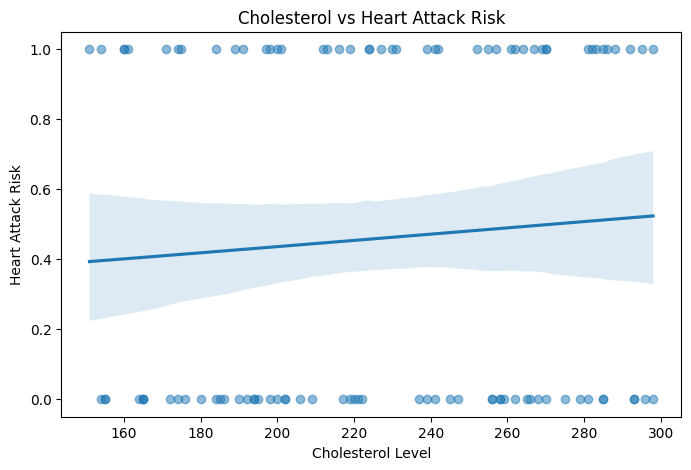

In [28]:
# 1. 콜레스테롤 vs 심장마비 위험 (산점도 + 회귀선)
plt.figure(figsize=(8, 5))
sns.regplot(x=df['cholesterol'], y=df['heart_attack_risk'], logistic=True, scatter_kws={'alpha': 0.5})
plt.xlabel('Cholesterol Level')
plt.ylabel('Heart Attack Risk')
plt.title('Cholesterol vs Heart Attack Risk')
plt.show()

**분석**
- 일반적으로 고콜레스테롤이 심혈관 질환과 연관이 있다고 알려져 있지만, 본 데이터에서는 반대 경향이 나타남.
- 특정 범위에서 낮은 콜레스테롤이 오히려 심장마비 위험을 증가시키는 요인일 가능성이 있음.
- 아니면.. 데이터 전처리 오류(이상치, 샘플 수 부족) 또는 추가적인 요인이 개입했을 가능성 고려 필요.

### Q2. 연령이 높아질수록 심장마비 발생 빈도가 높아질까?

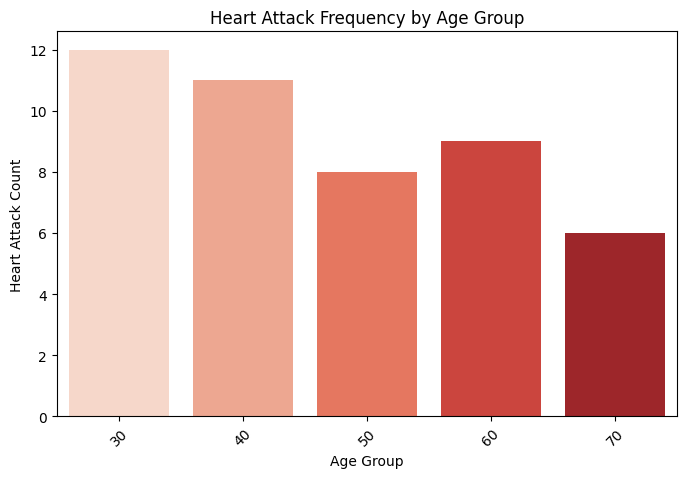

In [29]:
# 2. 연령대별 심장마비 발생 빈도 (막대 그래프)
df['age_group'] = (df['age'] // 10) * 10  # 연령을 10년 단위 그룹으로 변환
age_heart_attack = df[df['heart_attack_risk'] == 1].groupby('age_group')['heart_attack_risk'].count()
plt.figure(figsize=(8, 5))
sns.barplot(x=age_heart_attack.index, y=age_heart_attack.values, palette='Reds')
plt.xlabel('Age Group')
plt.ylabel('Heart Attack Count')
plt.title('Heart Attack Frequency by Age Group')
plt.xticks(rotation=45)
plt.show()

**분석**
- 높은 연령대(6,70대)에서 심장마비 발생 빈도가 높은 경향 보임
- 의외로 30대에서 심장마비 빈도 높음
- 현대 젊은이들의 식습관과 생활습관이 심장마비에 미치는 영향 고려 필요
- 나이가 들수록 혈관건강 악화 + 심혈관 질환 요인 누적 -> 심장마비 발생 확률 증가 예상

### Q3. 체중이 과체중 이상일수록 심장마비 위험이 커질까?

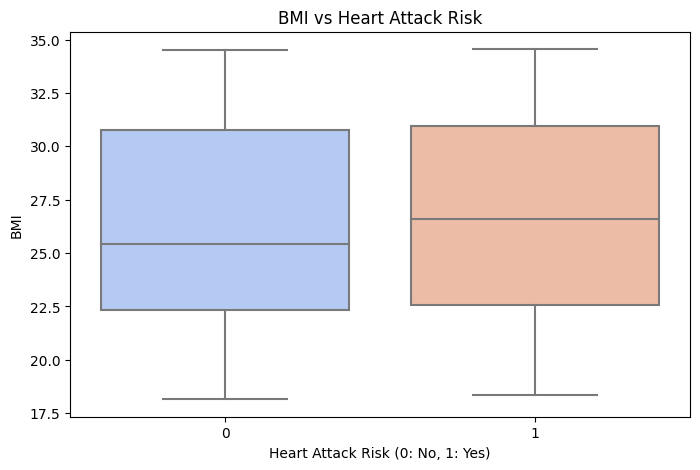

In [30]:
# 3. BMI vs 심장마비 위험 (박스플롯: 심장마비 유무에 따른 BMI 분포 확인)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['heart_attack_risk'], y=df['bmi'], palette='coolwarm')
plt.xlabel('Heart Attack Risk (0: No, 1: Yes)')
plt.ylabel('BMI')
plt.title('BMI vs Heart Attack Risk')
plt.show()

**분석**
- 심장마비 발생 그룹의 BMI 윗 범위가 상대적으로 높음
- 과체중 혹 비만일 경우 심장에 부담 증가, 혈압과 콜레스테롤 수치도 영향 받아 심장마비 위험 커질 수 O

### 혈압이 높을수록 심장마비 확률이 증가할까?

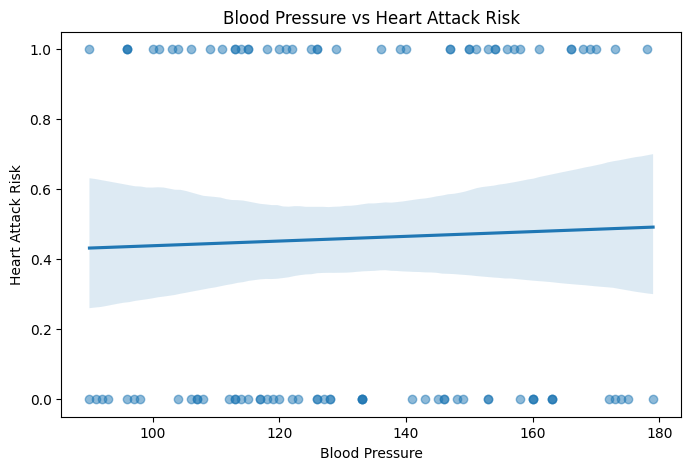

In [31]:
# 4. 혈압 vs 심장마비 위험 (산점도 + 회귀선: 혈압이 높을수록 위험 증가 여부 분석)
plt.figure(figsize=(8, 5))
sns.regplot(x=df['blood_pressure'], y=df['heart_attack_risk'], logistic=True, scatter_kws={'alpha': 0.5})
plt.xlabel('Blood Pressure')
plt.ylabel('Heart Attack Risk')
plt.title('Blood Pressure vs Heart Attack Risk')
plt.show()

**분석**
- 혈압이 높아질수록 심장마비 발생확률도 증가
- 고혈압도 심장마비 가능성을 증가시키는 위험요인으로 볼 수 있음
- 개별적인 혈압 수치보다는 고혈압 익간, 변동성 등의 요소가 더 중요한 요인일수도!
- 추가적으로 연령과 BMI를 같이 고려해보면 더 눈에 띄는 결과가 나올수도.

### 연령이 높을수록 콜레스테롤 수치가 증가할까?

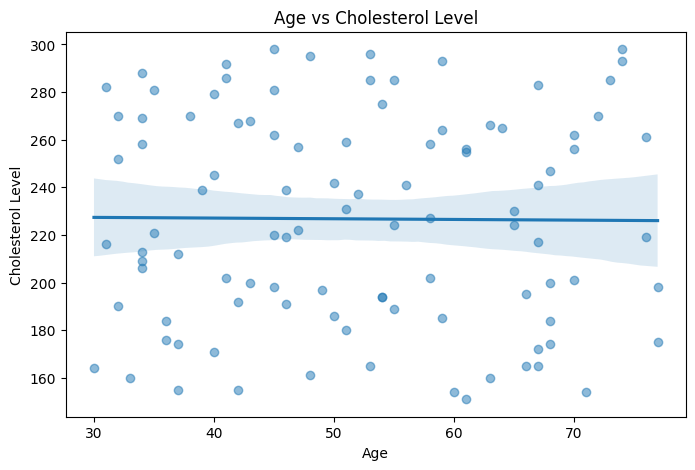

In [32]:
# 5. 연령 vs 콜레스테롤 (산점도 + 회귀선: 나이에 따라 콜레스테롤 수치 변화 확인)
plt.figure(figsize=(8, 5))
sns.regplot(x=df['age'], y=df['cholesterol'], scatter_kws={'alpha': 0.5})
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.title('Age vs Cholesterol Level')
plt.show()

**분석**
- 표 상에서 연령 증가와 콜레스테롤은 거의 연관 X
- 나이가 들수록 건강관리를 열심히 해서 그럴수도.
- 연령 증가에 따른 심혈관 질환 발생률과의 관계 추가분석 필요.

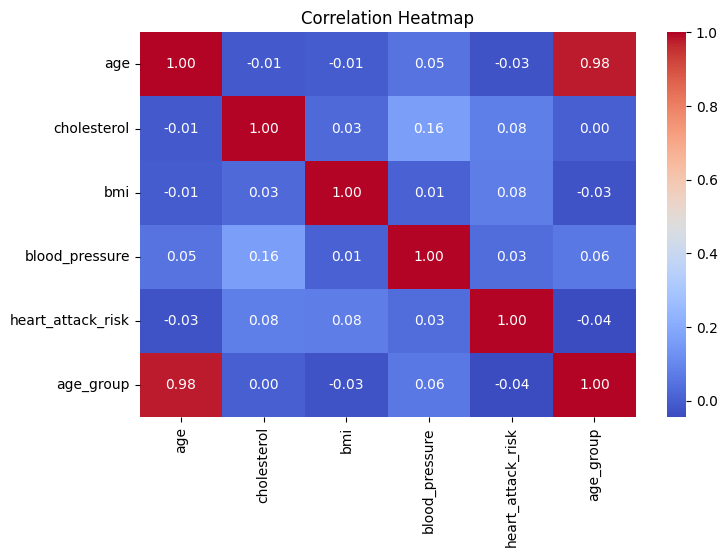

In [33]:
# 6. 변수 간 상관관계 히트맵 (숫자형 변수 간 관계 분석)
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## 📊 EDA 분석 컬럼 노트

| 변수명              | 내용                            | 데이터 타입   | 특징                                                      | 변수 아이디어                         |
|-------------------|-----------------------------|-------------|-------------------------------------------------------|-----------------------------------|
| age               | 환자의 나이                     | int         | 30~79세 사이의 값, 연령 증가와 심장마비 위험 간 연관 가능성            | 연령대를 기준으로 그룹화하여 분석 (age_group 활용)  |
| cholesterol       | 환자의 콜레스테롤 수치            | int         | 150~299 범위, 높은 콜레스테롤이 심장마비와 관련될 가능성       | 콜레스테롤을 범주형으로 변환하여 비교 (정상, 경계, 위험)  |
| bmi              | 환자의 체질량지수 (BMI)         | float       | 18~35 범위, 높은 BMI가 심장마비에 영향을 미칠 가능성           | BMI를 저체중, 정상, 과체중, 비만으로 분류하여 비교  |
| blood_pressure    | 환자의 혈압 수치                 | int         | 90~179 범위, 높은 혈압이 심장마비와 관계있을 가능성           | 고혈압 여부를 기준으로 이진 변수 생성 (정상/고혈압)  |
| heart_attack_risk | 심장마비 발생 여부 (0: 없음, 1: 있음) | int         | 0 또는 1의 범주형 데이터, 심장마비 발생 여부를 나타냄         | 심장마비 위험을 예측하는 타겟 변수로 활용  |
| age_group        | 연령을 10년 단위로 그룹화한 변수    | int         | 10년 단위로 연령을 그룹화하여 분석 가능                      | 연령대별 심장마비 위험도를 비교  |

